In [1]:
import scipy as sp
import numpy as np
from scipy.integrate import odeint
import random
import neurokit2 as nk
import frappy as fp
import scipy.stats as sts
import pyunicorn.timeseries as put
import hfda
import matplotlib.pyplot as plt
import frappy as fp

In [2]:
def rossler_system(current_state, t, n=0):
    x, y, z = current_state
    a = .1
    b = .1
    c = 14.
    dx_dt =-y - z +n*random.gauss(0,n*rsd)
    dy_dt = x + a*y
    dz_dt = b+ z*(x-c)
    
    return [dx_dt, dy_dt, dz_dt]

In [3]:
def funct1(x,y,z,var):
    xd=(-y-z)+np.random.normal(0,var)
    return xd

In [4]:
def funct2(x,y,z,var):
    a=0.1
    yd= (x+(a*y))+np.random.normal(0,var)
    return yd

In [49]:
def funct3(x,y,z,var):
    b=.1
    c=4
    zd=(b+z*(x-c))+np.random.normal(0,var)
    return zd

In [6]:
def rk(n1):
    n=11000
    h=.1
    x1=[]
    t1=[]
    x=random.uniform(0,1)
    y=random.uniform(0,1)
    z=random.uniform(1,2)
    k11=k12=k13=k21=k22=k23=k31=k32=k33=k41=k42=k43=0
    for i in range(0,n):
        k11=funct1(x,y,z,n1*rsd)
        k12=funct2(x,y,z,n1*rsd)
        k13=funct3(x,y,z,n1*rsd)
        
        k21=funct1(x+(.5*h*k11),y+(k12*.5*h),z+(k13*.5*h),n1*rsd)
        k22=funct2(x+(.5*h*k11),y+(k12*.5*h),z+(k13*.5*h),n1*rsd)
        k23=funct3(x+(.5*h*k11),y+(k12*.5*h),z+(k13*.5*h),n1*rsd)
        
        k31=funct1(x+(.5*h*k21),y+(k22*.5*h),z+(k23*.5*h),n1*rsd)
        k32=funct2(x+(.5*h*k21),y+(k22*.5*h),z+(k23*.5*h),n1*rsd)
        k33=funct3(x+(.5*h*k21),y+(k22*.5*h),z+(k23*.5*h),n1*rsd)
        
        k41=funct1(x+(h*k31),y+(k32*h),z+(k33*h),n1*rsd)
        k42=funct2(x+(h*k31),y+(k32*h),z+(k33*h),n1*rsd)
        k43=funct3(x+(h*k31),y+(k32*h),z+(k33*h),n1*rsd)
        
        x=x+((k11+(2*(k21+k31))+k41)*h/6.0)
        y=y+((k12+(2*(k22+k32))+k42)*h/6.0)
        z=z+((k13+(2*(k23+k33))+k43)*h/6.0)
        if(i>=1000):
            t1.append(i*h)
            x1.append(x)
    return(np.array(x1))

In [7]:
rsd=11.71

In [8]:
x = rk(0)

In [9]:
rn=np.random.normal(0,1,10000)

In [10]:
x1p=x+(np.random.normal(0,.01*rsd,10000))
x5p=x+(np.random.normal(0,.05*rsd,10000))
x10p=x+(np.random.normal(0,.1*rsd,10000))

In [11]:
hfda.measure(rn, 10)

1.9970436177290398

In [12]:
hfda.measure(x,10)

1.020834555570553

In [13]:
hfda.measure(x1p,10)

1.0225054622331904

In [14]:
hfda.measure(x5p,10)

1.0641688533007219

In [15]:
hfda.measure(x10p,10)

1.1717351865923902

In [16]:
mse0n = nk.complexity_mse(rn, dimension=1)[0]
mse0 = nk.complexity_mse(x, dimension=1)[0]
mse1 = nk.complexity_mse(x1p, dimension=1)[0]
mse2 = nk.complexity_mse(x5p, dimension=1)[0]
mse3 = nk.complexity_mse(x10p, dimension=1)[0]

In [17]:
print(mse0n,mse0,mse1,mse2,mse3)

0.07206273273329317 0.09004426313225164 0.09004837422323936 0.09038102824247658 0.09053850909580562


In [18]:
lzv0n,info=nk.complexity_lempelziv(rn)
lzv0,info=nk.complexity_lempelziv(x)
lzv1,info=nk.complexity_lempelziv(x1p)
lzv2,info=nk.complexity_lempelziv(x5p)
lzv3,info=nk.complexity_lempelziv(x10p)

In [19]:
print(lzv0n,lzv0,lzv1,lzv2,lzv3)

1.0218250819873527 0.0651097906597923 0.06909610437365714 0.09434275789480108 0.14749360741299888


In [20]:
entropy = nk.complexity_mse(x, dimension=1)
print(entropy[0])

0.09004426313225164


In [21]:
r0=put.recurrence_plot.RecurrencePlot(x,dim=3,tau=12,recurrence_rate=.1)
q0=[r0.determinism(),r0.laminarity(),r0.diag_entropy(),r0.vert_entropy(),r0.average_diaglength(),r0.trapping_time()]

r1=put.recurrence_plot.RecurrencePlot(x1p,dim=3,tau=12,recurrence_rate=.1)
q1=[r1.determinism(),r1.laminarity(),r1.diag_entropy(),r1.vert_entropy(),r1.average_diaglength(),r1.trapping_time()]

r2=put.recurrence_plot.RecurrencePlot(x5p,dim=3,tau=12,recurrence_rate=.1)
q2=[r2.determinism(),r2.laminarity(),r2.diag_entropy(),r2.vert_entropy(),r2.average_diaglength(),r2.trapping_time()]

r3=put.recurrence_plot.RecurrencePlot(x10p,dim=3,tau=12,recurrence_rate=.1)
q3=[r3.determinism(),r3.laminarity(),r3.diag_entropy(),r3.vert_entropy(),r3.average_diaglength(),r3.trapping_time()]

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


In [22]:
print(q0,q1,q2,q3)

[0.9946423675211551, 0.9957509273964943, 3.331606859055002, 2.114220371185736, 27.61219885405304, 6.772903511535689] [0.990290760199378, 0.9952796669470769, 3.2754982609388357, 2.1146652848969048, 25.44331713872169, 6.7700345026505335] [0.9449273974570293, 0.9830591721184727, 2.6656490590973667, 2.161932398085257, 13.89137140203976, 6.677698495796129] [0.8906363658308917, 0.945588027237788, 2.2889412220834227, 2.2323467117479674, 8.170302719381052, 6.203072617228605]


In [23]:
print(r0.average_diaglength(),r1.average_diaglength(),r2.average_diaglength(),r3.average_diaglength())

27.61219885405304 25.44331713872169 13.89137140203976 8.170302719381052


In [24]:
r0n=put.recurrence_plot.RecurrencePlot(rn,dim=3,tau=1,recurrence_rate=.1)
q0n=[r0n.determinism(),r0n.laminarity(),r0n.diag_entropy(),r0n.vert_entropy(),r0n.average_diaglength(),r0n.trapping_time()]

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


In [25]:
q0n

[0.7117203508352389,
 0.3363941922345704,
 1.2872208353434809,
 1.0041634551657945,
 2.8642441300477124,
 2.551394444680483]

In [26]:
r0n.vert_entropy()

1.0041634551657945

In [27]:
xs=(x-min(x))/(max(x)-min(x))
x1ps=(x1p-min(x1p))/(max(x1p)-min(x1p))
x5ps=(x5p-min(x5p))/(max(x5p)-min(x5p))
x10ps=(x10p-min(x10p))/(max(x10p)-min(x10p))
rns=(rn-min(rn))/(max(rn)-min(rn))

In [28]:
sen0n,info=nk.entropy_shannon(rn,symbolize=5)
maxen0n, _ = nk.entropy_maximum(rn)
sen0,info=nk.entropy_shannon(xs,symbolize=5)
maxen0, _ = nk.entropy_maximum(x)
sen1,info=nk.entropy_shannon(x1p,symbolize=5)
maxen1, _ = nk.entropy_maximum(x1p)
sen2,info=nk.entropy_shannon(x5p,symbolize=5)
maxen2, _ = nk.entropy_maximum(x5p)
sen3,info=nk.entropy_shannon(x10p,symbolize=5)
maxen3, _ = nk.entropy_maximum(x10p)

In [29]:
print(sen0,sen1,sen2,sen3,sen0n)

2.3111383539381882 2.309597307483913 2.2991700333970293 2.289595975073257 1.6405629764049545


In [30]:
print(maxen0,maxen1,maxen2,maxen3,maxen0n)

13.287712379549449 13.287712379549449 13.287712379549449 13.287712379549449 13.287712379549449


In [31]:
apen0n,info=nk.entropy_approximate(rn)

apen0,info=nk.entropy_approximate(xs)
apen1,info=nk.entropy_approximate(x1p)
apen2,info=nk.entropy_approximate(x5p)
apen3,info=nk.entropy_approximate(x10p)


In [32]:
print(apen0,apen1,apen2,apen3,apen0n)

0.3783066564165174 0.3818815020166335 0.4540415284080903 0.6454602934766545 2.205217737318658


In [33]:
samen0n,info=nk.entropy_sample(rn)

samen0,info=nk.entropy_sample(xs)
samen1,info=nk.entropy_sample(x1ps)
samen2,info=nk.entropy_sample(x5ps)
samen3,info=nk.entropy_sample(x10ps)

In [34]:
print(samen0,samen1,samen2,samen3,samen0n)

0.3588597541809425 0.36216113460782473 0.43350380874226513 0.6056942002094147 2.1804263840345888


In [35]:
kf0n,info=nk.fractal_katz(rn)
kf0,info=nk.fractal_katz(x)
kf1,info=nk.fractal_katz(x1p)
kf2,info=nk.fractal_katz(x5p)
kf3,info=nk.fractal_katz(x10p)

In [36]:
print(kf0,kf1,kf2,kf3,kf0n)

3.0280623067367802 3.021519649964437 3.0984679741593526 3.41307811561024 6.6583979721895625


In [37]:
pe0n,info=nk.entropy_permutation(rn, conditional=True, algorithm=nk.entropy_renyi, alpha=2)
pe0,info=nk.entropy_permutation(x, conditional=True, algorithm=nk.entropy_renyi, alpha=2)
pe1,info=nk.entropy_permutation(x1p, conditional=True, algorithm=nk.entropy_renyi, alpha=2)
pe2,info=nk.entropy_permutation(x5p, conditional=True, algorithm=nk.entropy_renyi, alpha=2)
pe3,info=nk.entropy_permutation(x10p, conditional=True, algorithm=nk.entropy_renyi, alpha=2)

In [38]:
print(pe0,pe1,pe2,pe3,pe0n)

0.014822343218552374 0.015829290412145685 0.07020595678333888 0.17525211415618333 0.30169412210966706


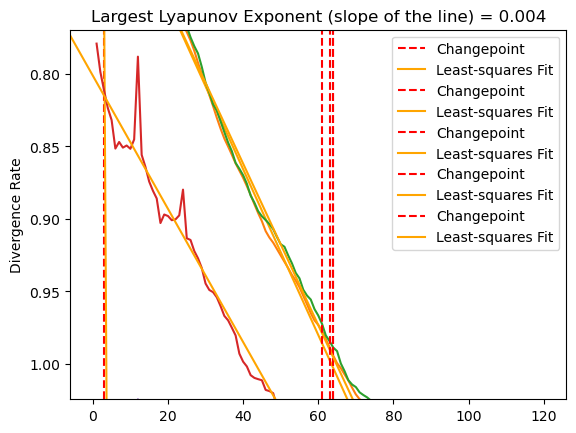

In [39]:
le0n,info=nk.complexity_lyapunov(rn,dimension=3,delay=1,method="makowski", show=True)
le0,info=nk.complexity_lyapunov(x,dimension=3,delay=12,method="makowski", show=True)
le1,info=nk.complexity_lyapunov(x1p,dimension=3,delay=12,method="makowski", show=True)
le2,info=nk.complexity_lyapunov(x5p,dimension=3,delay=12,method="makowski", show=True)
le3,info=nk.complexity_lyapunov(x10p,dimension=3,delay=12,method="makowski", show=True)


In [40]:
print(le0,le1,le2,le3,le0n)

0.005720423021199934 0.005571312283342174 0.0045946318011667224 0.003558583567321612 0.4237886703726146


In [41]:
d20n,info=nk.fractal_correlation(rn,dimension=3,delay=1)
d20,info=nk.fractal_correlation(x,dimension=3,delay=12)
d21,info=nk.fractal_correlation(x1p,dimension=3,delay=12)
d22,info=nk.fractal_correlation(x5p,dimension=3,delay=12)
d23,info=nk.fractal_correlation(x10p,dimension=3,delay=12)

In [42]:
print(d20,d21,d22,d23,d20n)

1.8107634427995654 1.8153621349097184 1.9516773218067462 2.1874221985278437 2.4764774085811734


In [43]:
h0n,info=nk.fractal_hurst(rn,corrected=True)
h0,info=nk.fractal_hurst(x,corrected=True)
h1,info=nk.fractal_hurst(x1p,corrected=True)
h2,info=nk.fractal_hurst(x5p,corrected=True)
h3,info=nk.fractal_hurst(x10p,corrected=True) 

In [44]:
print(h0,h1,h2,h3,h0n)

0.25407779666688013 0.25405302361265203 0.2551699777174748 0.2569156857099745 0.509713010126725


## Periodic changes

In [46]:
x13=rk(0)

In [48]:
x8p7=rk(0)

In [50]:
x4=rk(0)

In [51]:
print(hfda.measure(x, 10),hfda.measure(x13, 10),hfda.measure(x8p7, 10),hfda.measure(x4, 10))

1.020834555570553 1.0210176231372787 1.0199879164634242 1.0194382480822877


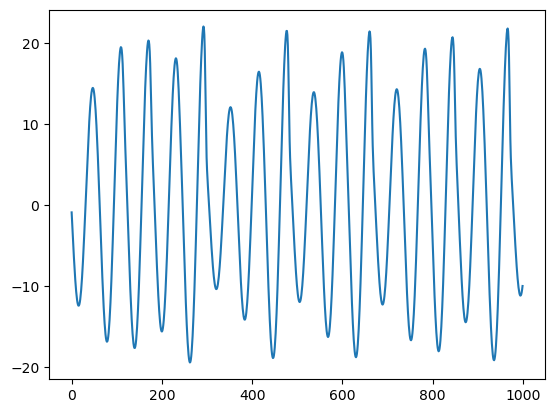

In [56]:
plt.plot(x[0:1000])

In [57]:
mse0 = nk.complexity_mse(x, dimension=1)[0]
mse1 = nk.complexity_mse(x13, dimension=1)[0]
mse2 = nk.complexity_mse(x8p7, dimension=1)[0]
mse3 = nk.complexity_mse(x4, dimension=1)[0]

In [58]:
print(mse0,mse1,mse2,mse3)

0.09004426313225164 0.094298474265763 0.08192584617675905 0.064626792724444


In [59]:
lzv0,info=nk.complexity_lempelziv(x)
lzv1,info=nk.complexity_lempelziv(x13)
lzv2,info=nk.complexity_lempelziv(x8p7)
lzv3,info=nk.complexity_lempelziv(x4)

In [60]:
print(lzv0,lzv1,lzv2,lzv3)

0.0651097906597923 0.03321928094887362 0.037205594662738456 0.010630169903639559


In [61]:
def tau(x):
    mu=np.mean(x)
    sig2=np.var(x)
    xn=x-mu
    acf=np.correlate(xn,xn,'full')[len(xn)-1:]
    acf=acf/sig2/len(xn)
    tau=np.where(acf<(1./np.exp(1)))[0][0]
    return(tau)

In [62]:
r0=put.recurrence_plot.RecurrencePlot(x,dim=3,tau=tau(x),recurrence_rate=.1)
q0=[r0.determinism(),r0.laminarity(),r0.diag_entropy(),r0.vert_entropy(),r0.average_diaglength(),r0.trapping_time()]

r1=put.recurrence_plot.RecurrencePlot(x13,dim=3,tau=tau(x13),recurrence_rate=.1)
q1=[r1.determinism(),r1.laminarity(),r1.diag_entropy(),r1.vert_entropy(),r1.average_diaglength(),r1.trapping_time()]

r2=put.recurrence_plot.RecurrencePlot(x8p7,dim=3,tau=tau(x8p7),recurrence_rate=.1)
q2=[r2.determinism(),r2.laminarity(),r2.diag_entropy(),r2.vert_entropy(),r2.average_diaglength(),r2.trapping_time()]

r3=put.recurrence_plot.RecurrencePlot(x4,dim=3,tau=tau(x4),recurrence_rate=.1)
q3=[r3.determinism(),r3.laminarity(),r3.diag_entropy(),r3.vert_entropy(),r3.average_diaglength(),r3.trapping_time()]

Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...


In [63]:
print(q0,q1,q2,q3)

[0.9946423675211551, 0.9957509273964943, 3.331606859055002, 2.114220371185736, 27.61219885405304, 6.772903511535689] [0.9945106032180795, 0.9961584806831788, 3.0916112098853272, 2.265938969050862, 27.2805279799572, 7.355656181786021] [0.9961768563519898, 0.9994788011643012, 3.300992823014045, 1.7550118706074311, 33.661208314639204, 6.061837406301383] [0.9970979903995897, 0.9999685491997018, 2.5369037339721072, 0.8586551656160868, 56.249072277258236, 5.996334740669158]


In [65]:
apen0,info=nk.entropy_approximate(x)
apen1,info=nk.entropy_approximate(x13)
apen2,info=nk.entropy_approximate(x8p7)
apen3,info=nk.entropy_approximate(x4)

In [66]:
print(apen0,apen1,apen2,apen3)

0.3783066564165174 0.3962518373920805 0.3368048887776185 0.2738154633180936


In [67]:

samen2,info=nk.entropy_sample(x8p7)
samen3,info=nk.entropy_sample(x4)

In [68]:
print(samen2,samen3)

0.3154660691245247 0.2364008301705868


In [71]:
kf,info=nk.fractal_katz(x)
kf2,info=nk.fractal_katz(x8p7)
kf3,info=nk.fractal_katz(x4)

In [72]:
print(kf,kf2,kf3)

3.0280623067367802 2.9736024587866194 2.7711526061406895


In [73]:

pe2,info=nk.entropy_permutation(x8p7, conditional=True, algorithm=nk.entropy_renyi, alpha=2)
pe3,info=nk.entropy_permutation(x4, conditional=True, algorithm=nk.entropy_renyi, alpha=2)

In [75]:
print(pe0,pe2,pe3)

0.014822343218552374 0.015005330010900764 0.015138865576600501


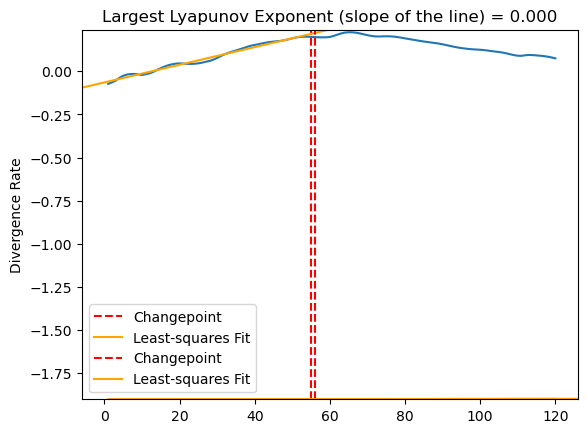

In [78]:
le2,info=nk.complexity_lyapunov(x8p7,dimension=3,delay=tau(x8p7),method="makowski", show=True)
le3,info=nk.complexity_lyapunov(x4,dimension=3,delay=tau(x4),method="makowski", show=True)

In [79]:
print(le2,le3)

0.005119091513695384 2.1865758495067388e-05


In [80]:
d22,info=nk.fractal_correlation(x8p7,dimension=3,delay=tau(x8p7))
d23,info=nk.fractal_correlation(x4,dimension=3,delay=tau(x4))

In [81]:
print(d22,d23)

1.5798861825394133 1.0080055752059711


In [82]:
h2,info=nk.fractal_hurst(x8p7,corrected=True)
h3,info=nk.fractal_hurst(x4,corrected=True) 

In [83]:
print(h2,h3)

0.24130420610907422 0.21845576977646064


In [84]:
sen2,info=nk.entropy_shannon(x8p7,symbolize=5)
maxen2, _ = nk.entropy_maximum(x8p7)
sen3,info=nk.entropy_shannon(x4,symbolize=5)
maxen3, _ = nk.entropy_maximum(x4)

In [86]:
print(sen2,sen3,sen0)

2.288619684187488 2.2165506519575864 2.3111383539381882
